In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Definindo o vetor de funções: $F(x, y) = (x^{2} + y^{2} - 4, e^{x} + y - 1)$.

In [50]:
# Definindo o vetor de funções
def F(x):
    f1 = x[0]**2 + x[1]**2 - 4
    f2 = np.exp(x[0]) + x[1] - 1
    return np.array([f1, f2])

Definição da matriz Jacobiana para o sistema:
\begin{align*}
    J(F)(x, y) =
    \begin{pmatrix}
        2\,x && 2\,y \\
        e^{x} && 1
    \end{pmatrix}.
\end{align*}

In [51]:
# Efetuando o cálculo da matriz Jacobiana do sistema
def Jacobiano(x):
    return np.array([[2*x[0], 2*x[1]],
                     [np.exp(x[0]), 1]])

In [52]:
# Algoritmo para Backtracking Line Search com condição de Armijo
def backtrackingLS(F, x, pk):
    alpha = 1
    while np.linalg.norm(F(x + alpha*pk)) > (1 - 1e-4*alpha)*np.linalg.norm(F(x)):
        alpha *= 0.5
    return alpha

In [53]:
def metodo_newton_raphson(F, J, x0, tol=1e-6, k_max=100):
    print("Trajetória:")
    print(f"x0 = ({x0[0]}, {x0[1]}).")
    for k in range(1, k_max+1):
        b = -F(x0)
        A = J(x0)  # Matriz Jacobiana avaliada no ponto x0
        pk = np.linalg.solve(A, b)  # Resolvendo o sistema linear Adx = b
        alpha = backtrackingLS(F, x0, pk)  # Aplicando Backtracking Line Search
        x = x0 + alpha*pk  # Atualizando a solução
        # Imprimindo os pontos da trajetória da iteração
        print(f"x{k} = ({x[0]}, {x[1]}).")
        if np.linalg.norm(F(x)) < tol:
            return (x, k)
        x0 = x
    return (None, k)

In [54]:
# Função para plotar pontos e curvar para visualização dos resultados obtidos
def visualizacao(x_pontos, y_pontos):
    # Destacando o ponto inicial
    x_destacado1 = x_pontos[0]
    y_destacado1 = y_pontos[0]

    # Destacando a solução
    x_destacado2 = x_pontos[7]
    y_destacado2 = y_pontos[7]

    # Define os limites do espaço xy
    x = np.linspace(-2.5, 3, 100)
    y = np.linspace(-2.5, 3, 100)
    X, Y = np.meshgrid(x, y)

    # Calcula os valores da primeira função
    f1 = X**2 + Y**2 - 4

    # Calcula os valores da segunda função
    f2 = np.exp(X) + Y - 1

    # Cria a figura e os eixos
    fig, ax = plt.subplots()

    # Plota a curva de nível da primeira função (apenas um nível)
    contour1 = ax.contour(X, Y, f1, levels=[0], colors="#19d668", linewidths=2)
    linha_proxy_1 = mlines.Line2D([], [], color='#19d668', linewidth=1, label=f'$f_1(x, y) = 0$')
    ax.add_artist(linha_proxy_1)

    # Plota a curva de nível da segunda função (apenas um nível)
    contour2 = ax.contour(X, Y, f2, levels=[0], colors="brown", linestyles='dashed', linewidths=2)
    linha_proxy_2 = mlines.Line2D([], [], color="brown", linestyle='dashed', linewidth=1, label=f'$f_2(x, y) = 0$')
    ax.add_artist(linha_proxy_2)

    # Plota os pontos
    ax.plot(x_pontos, y_pontos, 'o', color="#4f4fe6", label='Trajetória das iterações')

    # Destaca o ponto inicial e a solução aproximada do problema
    ax.plot(x_destacado1, y_destacado1, 'o', markersize=6, color='#ff00ff', label='Ponto inicial')
    ax.plot(x_destacado2, y_destacado2, 'o', markersize=6, color='#ff0000', label='Solução')

    # Adiciona rótulos aos eixos e o título
    ax.set_xlabel('Eixo x')
    ax.set_ylabel('Eixo y')
    ax.set_title('Pontos e Curvas de Nível de $f_1(x, y)$ e $f_2(x, y)$')

    ax.grid(True, which='major', color='lightgray', linestyle='-', linewidth=0.5)
    # Para adicionar legenda
    ax.legend()

    fator_escala = 1.7
    largura_original = fig.get_figwidth()  # Obtém a largura atual da figura
    altura_original = fig.get_figheight()  # Obtém a altura atual da figura
    fig.set_size_inches(largura_original * fator_escala, altura_original * fator_escala)  # Definindo o tamanho da figura

    plt.savefig('visualizacao.png', dpi=300)
    # Exibe o gráfico
    plt.show()

In [55]:
#Função principal
def main():
    # O ponto (65.0, 45.0) é utilizado para analisar a robustez do método
    x0 = np.array([1.0, 1.0])
    x, it = metodo_newton_raphson(F, Jacobiano, x0) # retorna a solução (caso haja convergência) e o número de iterações
    if x is not None:
        print(f"\nResultado obtido para a solução aproximada: x = ({x[0]}, {x[1]}).")
        print(f"Número de iterações: {it}.")
        res = F(x)
        print(f"Função aplicada no ponto: F(x) = ({res[0]}, {res[1]}).")

        # Definindo os pontos da trajetória de iteração
        x_pontos = np.array([1.0, 0.4590116465653368, -0.4970461917870095, -1.4181966920001345, -2.0995755099184943, -1.8337943389565958, -1.8163460409033478, -1.8162640706773958])
        y_pontos = np.array([1.0, 1.7909883534346633, 2.117209871301063, 1.814801264649169, 0.922845786774913, 0.8449311476334422, 0.8374055986717925, 0.8373678007388251])

        # Visualização dos resultados
        visualizacao(x_pontos, y_pontos)
    else:
        print(f"Método não convergiu.\nNúmero de iterações: {it}.")

Trajetória:
x0 = (1.0, 1.0).
x1 = (0.4590116465653368, 1.7909883534346633).
x2 = (-0.4970461917870095, 2.117209871301063).
x3 = (-1.4181966920001345, 1.814801264649169).
x4 = (-2.0995755099184943, 0.922845786774913).
x5 = (-1.8337943389565958, 0.8449311476334422).
x6 = (-1.8163460409033478, 0.8374055986717925).
x7 = (-1.8162640706773958, 0.8373678007388251).

Resultado obtido para a solução aproximada: x = (-1.8162640706773958, 0.8373678007388251).
Número de iterações: 7.
Função aplicada no ponto: F(x) = (8.147800656388426e-09, 5.463427488194839e-10).


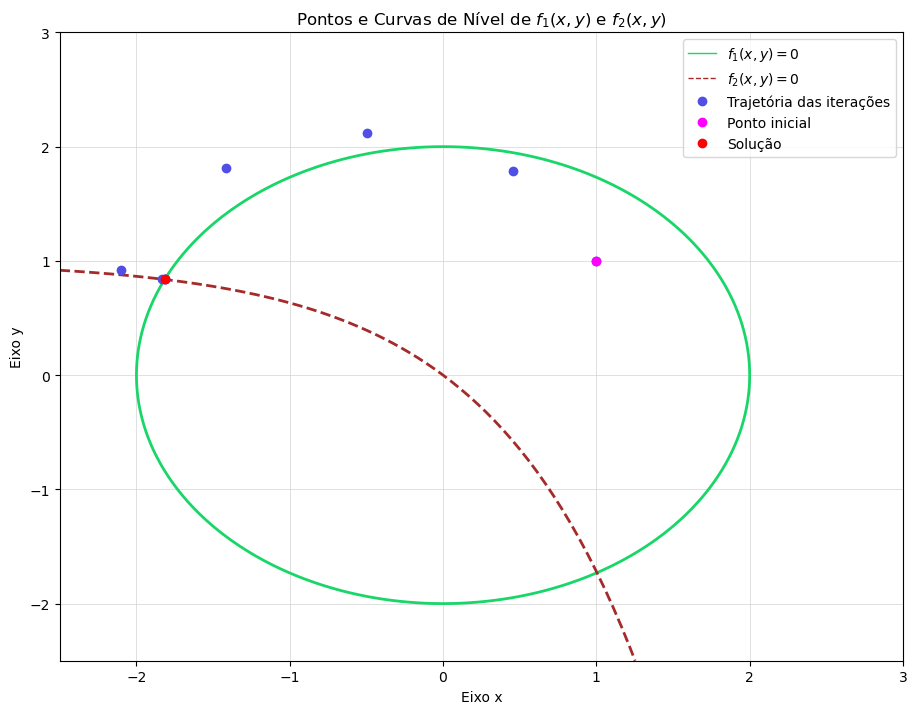

In [56]:
if __name__ == '__main__':
    main()